# Student Alcohol Consumption
Social, gender and study data from secondary school students

https://www.kaggle.com/uciml/student-alcohol-consumption/home

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]

In [113]:
# -mat: math course, -por: portugese course
mat = pd.read_csv('data/student-mat.csv')
por = pd.read_csv('data/student-por.csv')

In [114]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [115]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [116]:
mat.values.shape, por.values.shape

((395, 33), (649, 33))

The Portugese class has data on more students -- I'll start by investigating it alone.

## Exploratory Data Analysis

In [117]:
list(por)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [118]:
(pd.isna(por).values == True).any()

False

Yay! No missing values

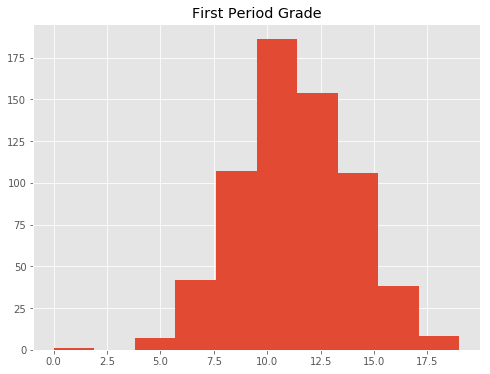

In [157]:
plt.rcParams['figure.figsize'] = [8, 6]
por.G1.hist()
plt.title('First Period Grade');

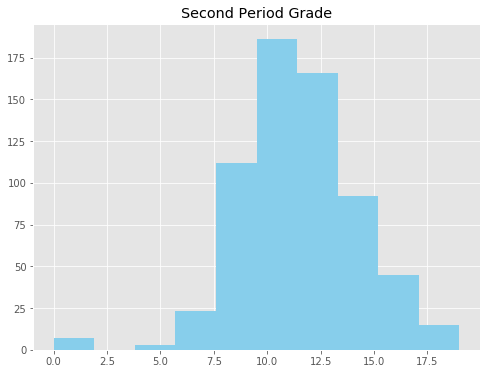

In [120]:
por.G2.hist(color='skyblue')
plt.title('Second Period Grade');

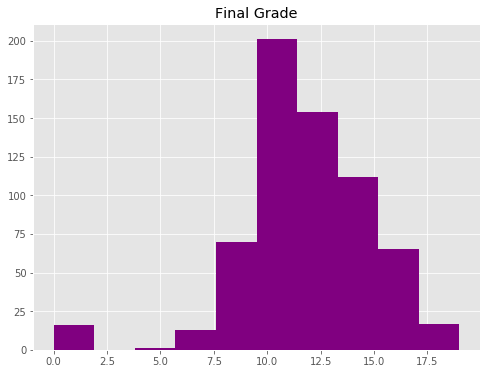

In [121]:
por.G3.hist(color='purple')
plt.title('Final Grade');

In [122]:
# Categorical data should sum to 649 to account for all students (assuming no missing values)
np.sum(por.sex == 'F'), np.sum(por.sex == 'M')

(383, 266)

More girls than boys in Portugese class!

In [123]:
np.sum(por.school == 'GP'), np.sum(por.school == 'MS') 

(423, 226)

Almost twice as many students go to Gabriel Pereira school vs Mousinho da Silveira.

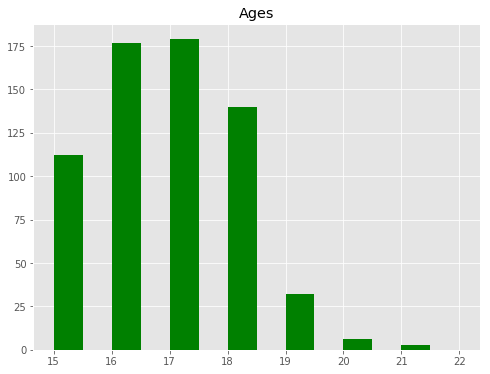

In [124]:
por.age.hist(bins=(22 - 15), width=0.5, color='green')
plt.title('Ages');

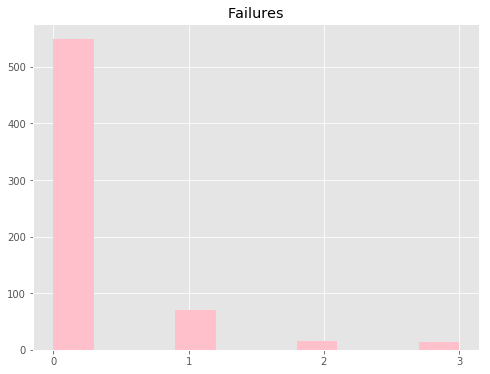

In [158]:
por.failures.hist(color='pink')
plt.xticks(range(4))
plt.title('Failures');

I'm not going to create a histogram for each feature. The basic ones are shown above.

Let's look at some correlations between features:

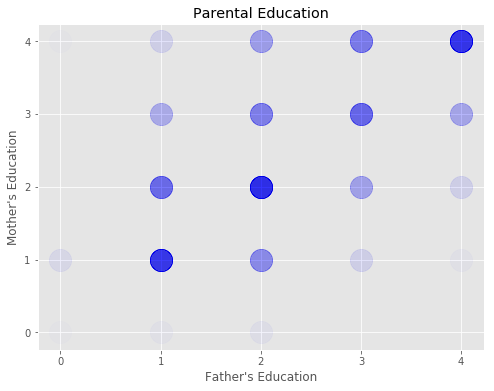

In [126]:
plt.scatter(por.Fedu, por.Medu, alpha=0.01, color='blue', s=500)
plt.xticks([0, 1, 2, 3, 4]); plt.yticks([0, 1, 2, 3, 4])
plt.title("Parental Education")
plt.xlabel("Father's Education")
plt.ylabel("Mother's Education");

Generally, a couple will have the same level of education. However, it seems that fathers 'marry up' more than mothers do -- fathers seem to marry women with a higher level of education more often than the converse. 

Let's see if this is actually true:

In [127]:
# Expect this number to be positive
par_edu = por.Medu - por.Fedu
sum(par_edu)

135

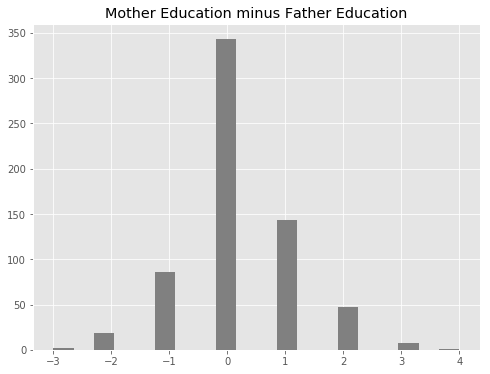

In [128]:
plt.hist(par_edu, color='gray', bins=20)
plt.title('Mother Education minus Father Education');

In [129]:
np.sum(por.Medu > por.Fedu), np.sum(por.Medu < por.Fedu)

(199, 107)

These results confirm my  suspicion. There are more parents in which the mother is more highly educated than the father.

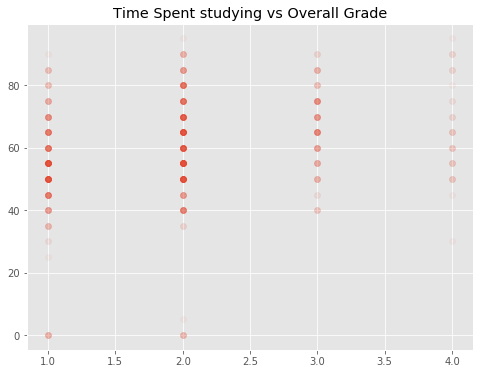

In [130]:
# Study time vs final grade (G3)
plt.scatter(por.studytime, por.G3 * 5, alpha=0.05)
plt.title('Time Spent studying vs Overall Grade');

I would've expected this to be a stronger positive correlation...

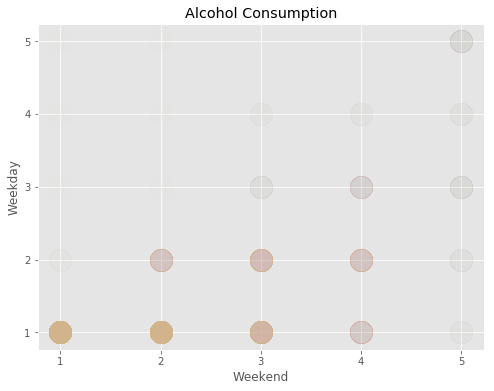

In [159]:
plt.scatter(por.Walc, por.Dalc, alpha=0.01, s=500, color='tan')
plt.xticks([i for i in range(1, 6)])
plt.yticks([i for i in range(1, 6)])
plt.xlabel('Weekend')
plt.ylabel('Weekday')
plt.title('Alcohol Consumption');

It looks like most points are under the line y = x. So, most students drink more on the weekends than they do on weekdays. Makes sense.

## Feature Selection and Preprocessing

Features:
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to - 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to - 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

I will include all features. I will need to one-hot encode most of the features, since they are mainly categorical. 

In [132]:
# Get encoders from sklearn
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
ohe = OneHotEncoder()
mms = MinMaxScaler()

In [133]:
# Store encoded features in a dictionary in order to make sure encoding is correct
features = {}

# Iterate over columns in dataframe (features)
for i in por.columns:
    
    # Disregard grades
    if i in ['G1', 'G2', 'G3']:
        continue
    
    # Min-max scale age and absences
    elif i in ['age', 'absences']:
        features[i] = mms.fit_transform(por[i].values.reshape(-1, 1)).ravel()
    
    # One-hot encode everything else
    else:
        
        # Will always have 1 'dummy variable' column to disregard, set as first
        features[i] = ohe.fit_transform(por[i].values.reshape(-1, 1)).toarray()[:, 1:]

/Users/Ashtekar15/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Ashtekar15/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [134]:
por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [135]:
features.keys()

dict_keys(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'])

In [136]:
temp = np.ones((por.values.shape[0], 1))

for i in features.values():
    temp = np.hstack((temp, i.reshape(por.values.shape[0], -1)))

X = temp[:, 1:]

In [137]:
X.shape

(649, 69)

In [138]:
y = por.G3.values

In [139]:
y.shape

(649,)

## Clustering

In [140]:
from sklearn.cluster import KMeans

# Inertia: sum of squared distances of samples to their closest cluster center
inertia_ls = []

# To determine best number of clusters (k)
for i in range(2, 21):
    kmc = KMeans(n_clusters=i)
    kmc.fit(X)
    inertia_ls.append(kmc.inertia_)

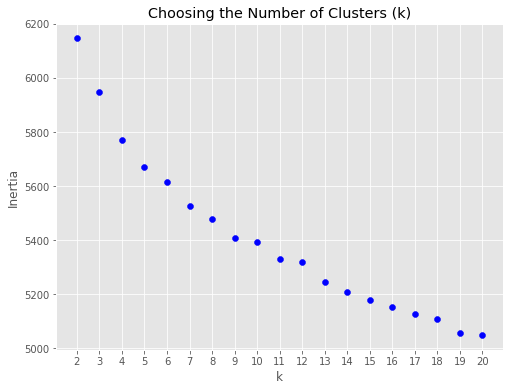

In [141]:
plt.scatter(x=range(2, 21), y=inertia_ls, color='blue')
plt.title('Choosing the Number of Clusters (k)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 21));

Use the 'elbow method' to choose k -- choose k as the point where the rate of change of inertia slows down most abruptly.

I'll choose k = 6

In [142]:
kmc = KMeans(n_clusters=6)
kmc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
kmc.labels_

array([5, 4, 4, 5, 3, 3, 0, 5, 3, 3, 5, 2, 5, 3, 0, 5, 5, 3, 1, 3, 3, 5,
       5, 0, 5, 1, 0, 1, 3, 5, 5, 5, 5, 3, 0, 2, 5, 5, 5, 0, 0, 5, 5, 1,
       0, 3, 3, 5, 0, 5, 1, 0, 5, 5, 3, 2, 3, 5, 0, 0, 5, 1, 1, 5, 3, 5,
       5, 3, 1, 2, 2, 0, 4, 2, 3, 3, 5, 0, 2, 3, 1, 2, 3, 1, 4, 5, 0, 0,
       0, 5, 3, 3, 3, 5, 1, 4, 3, 2, 5, 3, 5, 5, 5, 3, 3, 3, 0, 3, 5, 5,
       5, 3, 0, 0, 2, 5, 5, 3, 3, 3, 1, 1, 2, 5, 0, 1, 3, 4, 5, 2, 5, 2,
       2, 4, 0, 3, 2, 0, 5, 5, 3, 4, 1, 1, 4, 3, 4, 5, 4, 5, 3, 5, 1, 5,
       4, 2, 4, 2, 1, 0, 1, 5, 2, 4, 2, 1, 1, 5, 1, 0, 4, 0, 3, 1, 2, 0,
       0, 1, 4, 1, 0, 1, 0, 5, 3, 2, 5, 1, 3, 3, 0, 3, 5, 3, 3, 3, 1, 3,
       0, 3, 1, 2, 3, 0, 1, 1, 1, 3, 2, 1, 5, 3, 5, 5, 3, 3, 4, 0, 1, 5,
       3, 3, 4, 5, 3, 5, 0, 0, 5, 0, 3, 3, 3, 1, 2, 4, 1, 0, 5, 2, 0, 1,
       2, 2, 3, 0, 5, 5, 4, 3, 0, 2, 2, 3, 1, 3, 0, 5, 0, 4, 0, 1, 4, 1,
       0, 4, 0, 3, 5, 3, 5, 5, 4, 3, 4, 2, 2, 4, 2, 1, 3, 0, 0, 3, 1, 2,
       2, 4, 2, 5, 1, 2, 0, 4, 0, 3, 2, 1, 1, 2, 3,

In [144]:
# Group students together based on cluster assignments
c_ls = []

# Each element in list is a dataframe of students assigned to given cluster
for i in range(6):
    c_ls.append(por.iloc[kmc.labels_ == i])

In [145]:
# c_ls[0]

## Dimensionality Reduction

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)

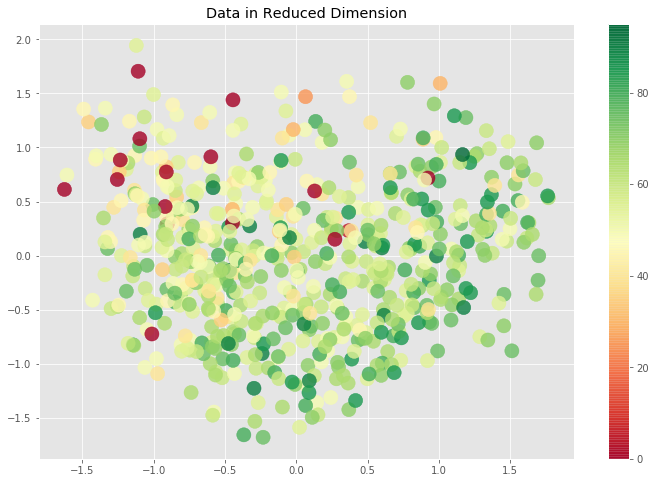

In [147]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(X_red[:, 0], X_red[:, 1], c=y*5, cmap='RdYlGn', s=200, alpha=.8)
plt.colorbar()
plt.title('Data in Reduced Dimension');

Green points correspond to good scores, while red points correspond to poor scores. 

The only real takeaway from this plot is the noticeable separation between dark green/dark red points. The dark red points are in the upper left, while the dark green points are in the bottom right. This shows that students who did well and students who did poorly have general differences in lifestyle as observed in the data.

## Linear Regression Model

In [148]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=False, fit_intercept=True, copy_X=True)
lin_reg.fit(X, y)
predictions = lin_reg.predict(X)

In [149]:
print('Actual\t Predicted')

for i in range(y.shape[0]):
    print(y[i], '\t', int(round(predictions[i])))

Actual	 Predicted
11 	 13
11 	 13
12 	 11
14 	 14
13 	 14
13 	 14
13 	 13
13 	 14
17 	 15
13 	 11
14 	 13
13 	 16
12 	 13
13 	 13
15 	 13
17 	 15
14 	 15
14 	 13
7 	 8
12 	 13
14 	 13
12 	 12
14 	 12
10 	 12
10 	 13
12 	 12
12 	 13
11 	 12
13 	 12
12 	 12
11 	 13
15 	 12
15 	 13
12 	 14
12 	 12
11 	 11
14 	 14
13 	 13
12 	 13
12 	 10
10 	 13
11 	 12
15 	 15
10 	 11
11 	 10
11 	 12
13 	 11
17 	 16
13 	 12
12 	 14
13 	 14
16 	 14
9 	 11
12 	 11
13 	 10
12 	 12
15 	 15
16 	 13
14 	 12
16 	 14
16 	 13
16 	 10
10 	 14
13 	 12
12 	 13
16 	 15
12 	 12
10 	 13
11 	 13
15 	 14
11 	 14
10 	 13
11 	 9
14 	 11
11 	 11
11 	 12
11 	 15
13 	 14
10 	 5
11 	 13
12 	 11
9 	 12
11 	 14
13 	 12
12 	 14
12 	 13
11 	 13
15 	 14
11 	 14
10 	 13
11 	 14
13 	 14
12 	 11
14 	 14
12 	 14
13 	 13
11 	 11
12 	 11
13 	 14
13 	 12
8 	 11
16 	 15
12 	 13
10 	 12
16 	 14
10 	 12
10 	 13
14 	 14
11 	 12
14 	 14
14 	 14
11 	 15
10 	 9
18 	 13
10 	 12
14 	 14
16 	 15
15 	 12
11 	 10
14 	 13
14 	 14
13 	 13
13 	 14
13 	 1

In [150]:
np.min(por.G3), np.max(por.G3)

(0, 19)

In [151]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, predictions)

1.8394128314410365

Not bad at all! Our linear regression model results in an average error of 1.84 when predicting final grade scores. 

(Final grade scores are on a 0 - 20 scale.)

## Support Vector Regressor Model

In [152]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', gamma='scale', C=1000)
svm.fit(X, y)
mean_absolute_error(y, svm.predict(X))

0.10464845391574804

An SVR model is able to learn non-linear associations in data. For this reason, an SVR will often outperform a linear model.

The parameter C controls regularization. The higher the C value, the less regularization. Therefore, if I make C very high, I will get great performance on the train set. 

I haven't train/test split the data, so the model may be overfitting and these results may be misleading.